Libraries

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import math

Dataset

In [89]:
x_train = np.array([0, 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

w = [3]
b = 0

Sigmoid Fxn

In [90]:
def sigmoid(z):
    
    g = 1/(1+np.exp(-z))
    return g

Finding Function f_wb

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) $$ 

where

$$g(z) = \frac{1}{1+e^{-z}}$$

In [91]:
def fxn(x, w, b):
    m = x.shape[0]

    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = sigmoid(np.dot(x[i], w)+b)
    return (f_wb)

Loss Fxn
$$
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
$$

 $$= -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$

In [92]:
def loss(x,y,w,b):

    a=sigmoid(np.dot(x, w)+b)
    loss=-(y)*math.log(a)-(1-y)*math.log(1-a)

    return loss

Cost Fxn
$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

In [93]:
def cost_fxn(X, y, w, b):
    
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        cost += loss(X[i],y[i],w,b)
             
    cost = cost / m
    return cost

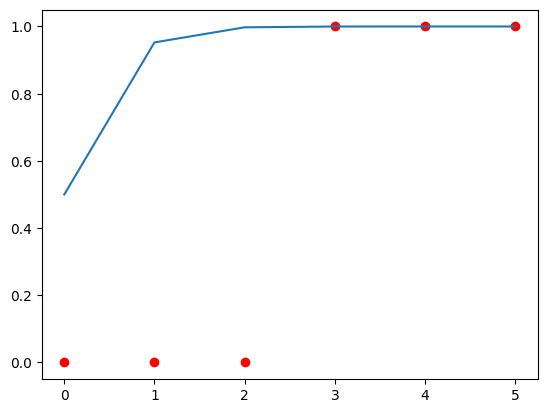

In [94]:
if len(w)==1:
    fxn1=fxn(x_train,w,b)

    plt.scatter(x_train,y_train,color="red")
    plt.plot(x_train,fxn1)
    plt.show()

Finding dJ/dw and dJ/db

$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
$$


In [95]:
def compute_gradient(x, y, w, b):
    dj_dw = 0
    dj_db = 0
    m = x.shape[0]
    a = fxn(x, w, b) - y
    dj_dw = (np.dot(a, x))/m
    dj_db = np.sum(a)/m
    return dj_dw, dj_db

Gradient Descent

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  

In [96]:
def gradient_descent(x, y, w, b, alpha, num_iters):
    J_history = []
    p_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        b -= alpha * dj_db
        w -= alpha * dj_dw
        J_history.append(cost_fxn(x, y, w, b))
        p_history.append([w, b])
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e}, w: {w}, b:{b}")

    return w, b, J_history, p_history


iterations = 10000
tmp_alpha = 1.0e-1


w_final, b_final, J_hist, p_hist = gradient_descent(
    x_train, y_train, w, b, tmp_alpha, iterations)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")


f_wb = fxn(x_train, w_final, b_final)
print("Cost is", cost_fxn(x_train, y_train, w_final, b_final))

Iteration    0: Cost 1.58e+00, w: [2.95087946], b:-0.04083286098354971
Iteration 1000: Cost 1.09e-01, w: [2.24993662], b:-5.33360648695033
Iteration 2000: Cost 7.63e-02, w: [2.90150611], b:-7.010326915105299
Iteration 3000: Cost 6.02e-02, w: [3.36514718], b:-8.189497495768904
Iteration 4000: Cost 5.01e-02, w: [3.73471493], b:-9.124541623173315
Iteration 5000: Cost 4.30e-02, w: [4.0449892], b:-9.907303220872791
Iteration 6000: Cost 3.76e-02, w: [4.31352254], b:-10.583530753843455
Iteration 7000: Cost 3.35e-02, w: [4.550705], b:-11.180070480657267
Iteration 8000: Cost 3.02e-02, w: [4.76331405], b:-11.714327973580453
Iteration 9000: Cost 2.75e-02, w: [4.95606745], b:-12.198365569782975
(w,b) found by gradient descent: ([5.13223632],-12.640525596327063)
Cost is 0.02522930735040049


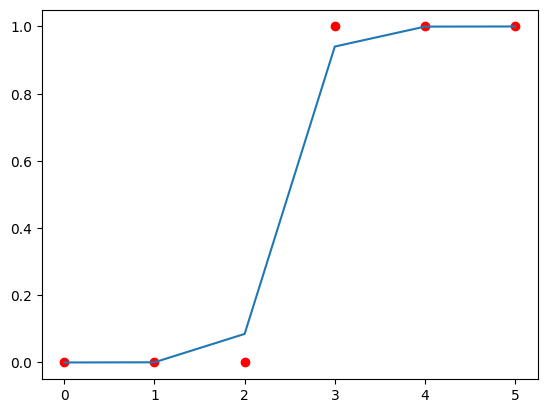

In [97]:
if len(w)==1:
    fxn2 = fxn(x_train, w_final, b_final)

    plt.scatter(x_train, y_train, color="red")
    plt.plot(x_train, fxn2)
    plt.show()